# Most general form of cross-validation
---

This provides no personalization, and still avoids the issue of using a subject's future data for prediction.

In [1]:
%pylab --no-import-all inline

from os import path
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
file = path.join("..", "data", "processed", "df.csv")
df_orig = pd.read_csv(file, index_col=0)

In [3]:
NUMBER_OF_DAYS = 10
df = df_orig[df_orig.L_PREOVULATION > NUMBER_OF_DAYS]  # No use predicting backward in time.
temp_measurements = ["TEMP" + str(i + 1) for i in range(NUMBER_OF_DAYS)]
features = ["AGE", *temp_measurements]

In [4]:
X = df[features]
y = df.L_PREOVULATION
grouping = df.ID

In [5]:
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
rfr = RandomForestRegressor(n_estimators=200, random_state=1337)
imp = Imputer(strategy='median')
pipeline = Pipeline([('imp', imp), ('rfr', rfr)])

In [6]:
from sklearn.model_selection import GroupKFold, cross_val_predict
cv = GroupKFold(n_splits=10)

In [7]:
from sklearn.model_selection import cross_val_score
y_pred = cross_val_predict(pipeline, X, y, 
                           cv=cv, groups=grouping,
                           verbose=True, n_jobs=-1)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.0min finished


In [8]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred=y_pred, y_true=y)

16.378908325917564

In [9]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join("..", 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport visualization.visualize
from visualization.visualize import modified_bland_altman_plot

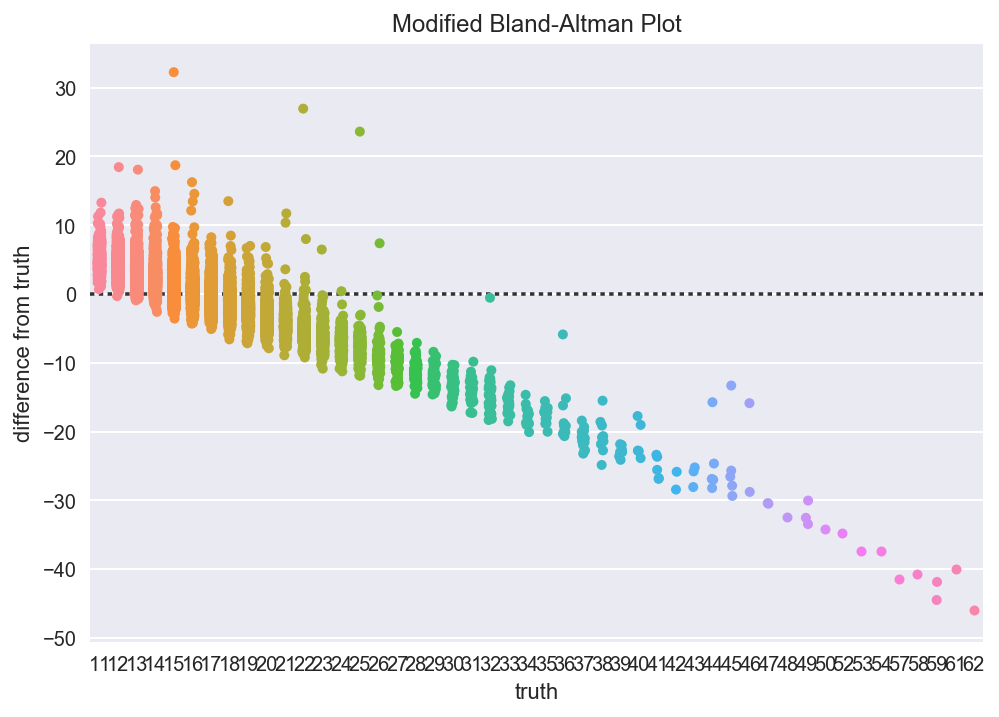

In [10]:
modified_bland_altman_plot(y_pred, y);

## Discussion
---

This model is extremely simple. Our features are only the first six temperatures of the cycle and the participant's age. With it, we achieve a MSE of about 18, which is not that far from the Bortot paper's 15. And with the first ten days, we get about 16.5. In terms of use case, they are about equal to the Bortot result.

In [11]:
df.L_PERIOD.median()

5.0

Now, the median period length is 5, which means that we are really using measurements of BBT during the period to determine the day of ovulation.

Since this model has no personalization at all, it's exciting to see how well a personalized model will do.